# GETTING STARTED
This is interactive code, which runs sequentially in cells. 
You can run each cell independently or run everything all at once.

You cannot run a cell without running the cells above it or it will have errors.

To run everything at once:
- Go to the 'Run' menu at the top. Sometimes this menu is called 'Cells'
- Tap 'Run All Cells'/'Run All'.
- Click the links below to see the fancy plots. They are interactive.


### Links

*These links will not work until you 'Run All Cells' as instructed above*

- [Plot Confirmed Cases by Province/State](#plot_confirmed)
- [Plot Growth by Province/State](#plot_growth)
- [Plot Acceleration by Province/State](#plot_acceleration)

## Set target country

In [14]:
# MODIFY THIS TO GET YOUR TARGET COUNTRY

# COUNTRIES INCLUDE

# ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
#  'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
#  'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Benin' 'Bhutan'
#  'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria'
#  'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
#  'Chile' 'China' 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
#  'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cruise Ship' 'Cuba' 'Cyprus'
#  'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
#  'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Finland' 'France'
#  'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guatemala'
#  'Guernsey' 'Guinea' 'Guyana' 'Holy See' 'Honduras' 'Hungary' 'Iceland'
#  'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
#  'Japan' 'Jersey' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kosovo'
#  'Kuwait' 'Latvia' 'Lebanon' 'Liberia' 'Liechtenstein' 'Lithuania'
#  'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Martinique' 'Mauritania'
#  'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco' 'Namibia'
#  'Nepal' 'Netherlands' 'New Zealand' 'Nigeria' 'North Macedonia' 'Norway'
#  'Oman' 'Pakistan' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland'
#  'Portugal' 'Qatar' 'Republic of the Congo' 'Romania' 'Russia' 'Rwanda'
#  'Saint Lucia' 'Saint Vincent and the Grenadines' 'San Marino'
#  'Saudi Arabia' 'Senegal' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia'
#  'Slovenia' 'Somalia' 'South Africa' 'Spain' 'Sri Lanka' 'Sudan'
#  'Suriname' 'Sweden' 'Switzerland' 'Taiwan*' 'Tanzania' 'Thailand'
#  'The Bahamas' 'The Gambia' 'Togo' 'Trinidad and Tobago' 'Tunisia'
#  'Turkey' 'US' 'Ukraine' 'United Arab Emirates' 'United Kingdom' 'Uruguay'
#  'Uzbekistan' 'Venezuela' 'Vietnam']

TARGET_COUNTRY = "Canada"

## Download dataset 

Dataset is at https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/

In [15]:
import pandas as pd
import requests
import io

confirmedUrl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

r = requests.get(confirmedUrl)
if r.ok:
    data = r.content.decode('utf8')
    df = pd.read_csv(io.StringIO(data))
    
# Rename Province/State and Country/Region
df = df.rename(columns={'Province/State': 'provincestate', 'Country/Region': 'countryregion'})

# Remove unneeded columns
# df = df.drop(['Lat', 'Long', 'provincestate'], axis=1)

df.head()

,provincestate,countryregion,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,6,6,7,7,11
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


In [16]:
# Remove unneeded columns
# df = df.drop(['Lat', 'Long', 'provincestate'], axis=1)

# Reshape 
df_confirmed = df.melt(var_name='date', value_name='number', id_vars=['countryregion', 'provincestate', 'Lat', 'Long'])

df_confirmed.head()

# countries = df_confirmed['countryregion'].unique()
# countries.sort(axis=0)
# print(countries)

,countryregion,provincestate,Lat,Long,date,number
0,Afghanistan,NaN,33.0000,65.0000,1/22/20,0
1,Albania,NaN,41.1533,20.1683,1/22/20,0
2,Algeria,NaN,28.0339,1.6596,1/22/20,0
3,Andorra,NaN,42.5063,1.5218,1/22/20,0
4,Angola,NaN,-11.2027,17.8739,1/22/20,0


In [17]:
# Restrict to target country
df_confirmed_grouped = df_confirmed.query('countryregion == "{}"'.format(TARGET_COUNTRY)).copy()
df_confirmed_grouped['provincestate'] = df_confirmed_grouped['provincestate'].fillna('Unknown')

df_confirmed_grouped.head(20)

,countryregion,provincestate,Lat,Long,date,number
35,Canada,Alberta,53.9333,-116.5765,1/22/20,0
36,Canada,British Columbia,49.2827,-123.1207,1/22/20,0
37,Canada,Grand Princess,37.6489,-122.6655,1/22/20,0
38,Canada,Manitoba,53.7609,-98.8139,1/22/20,0
39,Canada,New Brunswick,46.5653,-66.4619,1/22/20,0
40,Canada,Newfoundland and Labrador,53.1355,-57.6604,1/22/20,0
41,Canada,Nova Scotia,44.6820,-63.7443,1/22/20,0
42,Canada,Ontario,51.2538,-85.3232,1/22/20,0
43,Canada,Prince Edward Island,46.5107,-63.4168,1/22/20,0
44,Canada,Quebec,52.9399,-73.5491,1/22/20,0


## Calculate metrics

In [23]:
# Calculate change
window = 3
growthCalculation = lambda x: (x.max())

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

x = pd.Series(range(0,window)).values.reshape(-1,1)
linearCoefficient = lambda values: (linear_regressor.fit(x, values.values.reshape(-1,1)).coef_)

df_confirmed_grouped['growth_rate'] = df_confirmed_grouped.groupby(['provincestate'])['number'].rolling(window).apply(linearCoefficient).fillna(0).reset_index(level=0, drop=True)
df_confirmed_grouped['acceleration'] = df_confirmed_grouped['growth_rate'].rolling(window).apply(linearCoefficient).fillna(0)

df_confirmed_grouped.head(10)

,countryregion,provincestate,Lat,Long,date,number,growth_rate,acceleration
35,Canada,Alberta,53.9333,-116.5765,1/22/20,0,0.0,0.0
36,Canada,British Columbia,49.2827,-123.1207,1/22/20,0,0.0,0.0
37,Canada,Grand Princess,37.6489,-122.6655,1/22/20,0,0.0,0.0
38,Canada,Manitoba,53.7609,-98.8139,1/22/20,0,0.0,0.0
39,Canada,New Brunswick,46.5653,-66.4619,1/22/20,0,0.0,0.0
40,Canada,Newfoundland and Labrador,53.1355,-57.6604,1/22/20,0,0.0,0.0
41,Canada,Nova Scotia,44.6820,-63.7443,1/22/20,0,0.0,0.0
42,Canada,Ontario,51.2538,-85.3232,1/22/20,0,0.0,0.0
43,Canada,Prince Edward Island,46.5107,-63.4168,1/22/20,0,0.0,0.0
44,Canada,Quebec,52.9399,-73.5491,1/22/20,0,0.0,0.0


## Plot
### Prepare chart

In [24]:
# Show fig
import plotly.express as px
import plotly.graph_objects as go

colorSequence = ["red", "royalblue"]

layout = go.Layout(title="COVID-19 confirmed cases by province/state", margin={"l": 100, "r": 100},
                   colorway=["#287D95", "#EF533B"], legend={"x": 0.7, "y": 1, 'orientation': "h"},
                   yaxis={'title': 'Confirmed cases'},                   
                   xaxis={"title": "Date",
                         'domain': [0, 0.92]},
                   height=1000)

chinaColor = colorSequence[0]

# Only plot 'confirmed', since we can't control the dashed lines and second-axes using Plotly Express
trace_confirmed = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='number', 
                           color='provincestate',).data

# Add growth rate
trace_growth = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='growth_rate', 
                           color='provincestate',).data

# Add acceleration
trace_accel = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='acceleration', 
                           color='provincestate',).data

<a id='plot_confirmed'></a>
### Plot Confirmed Cases by Province/State

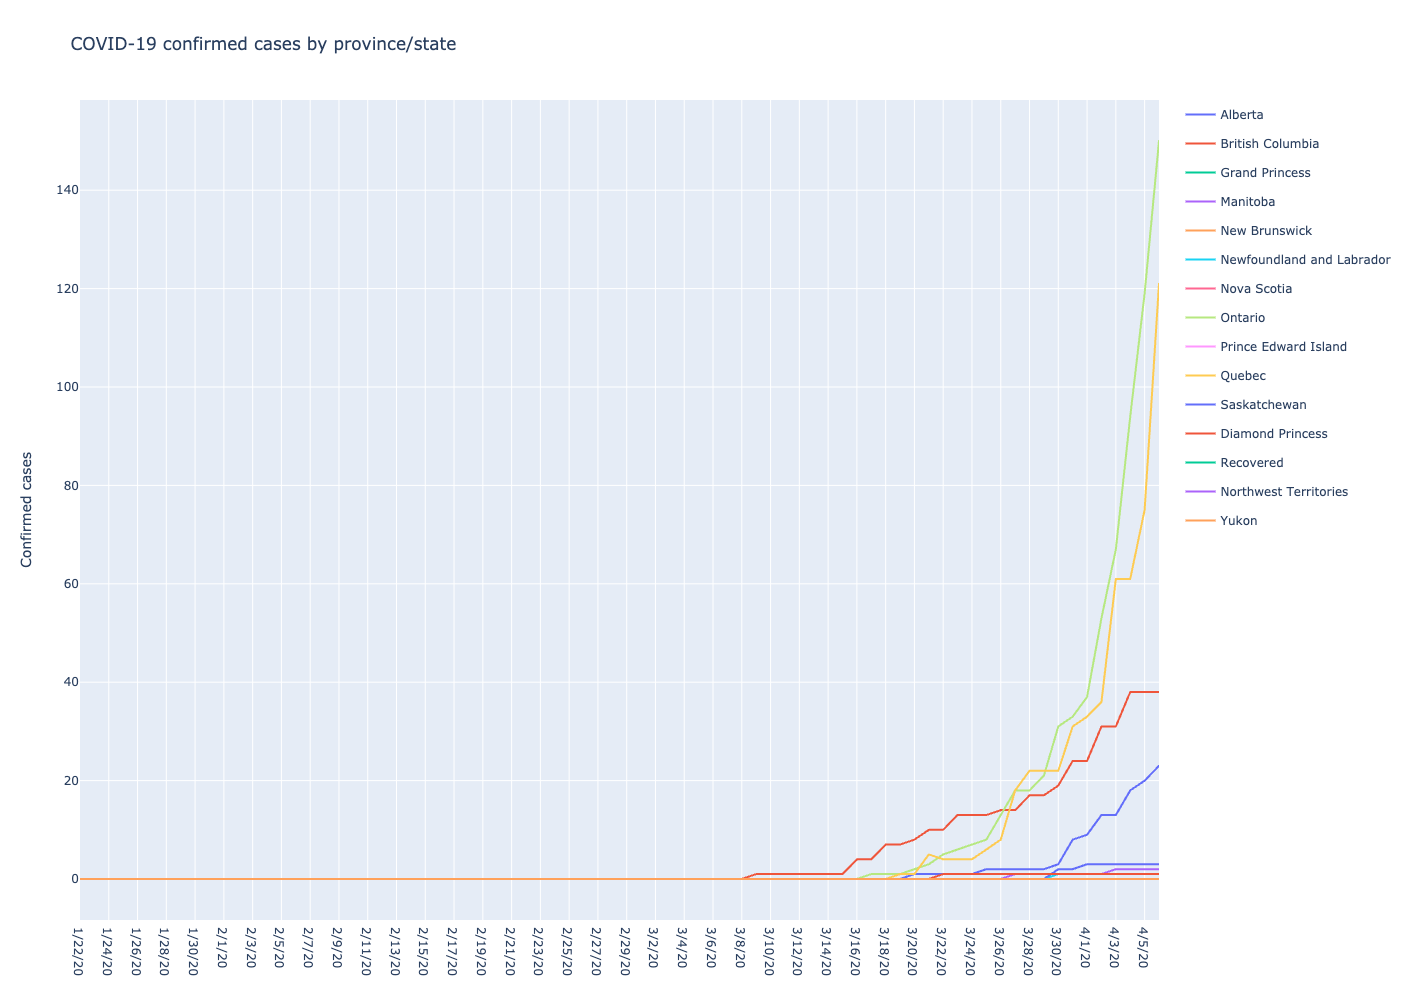

In [25]:
layout = go.Layout(title="COVID-19 confirmed cases by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_growth'></a>
### Plot Growth Rate by Province/State

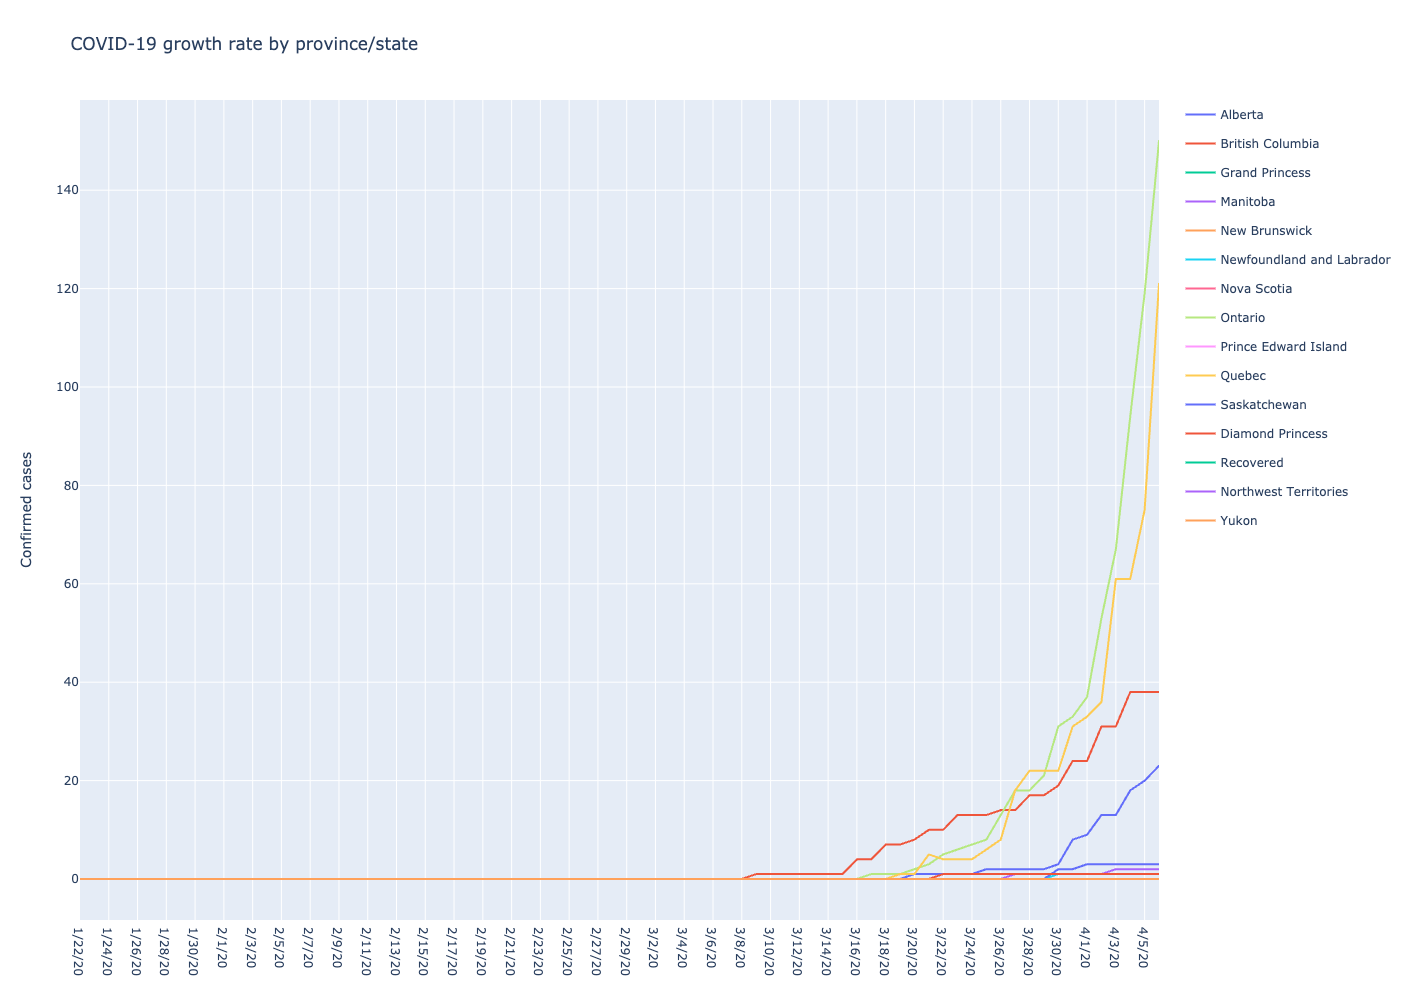

In [26]:
layout = go.Layout(title="COVID-19 growth rate by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_acceleration'></a>
### Plot Acceleration by Province/State

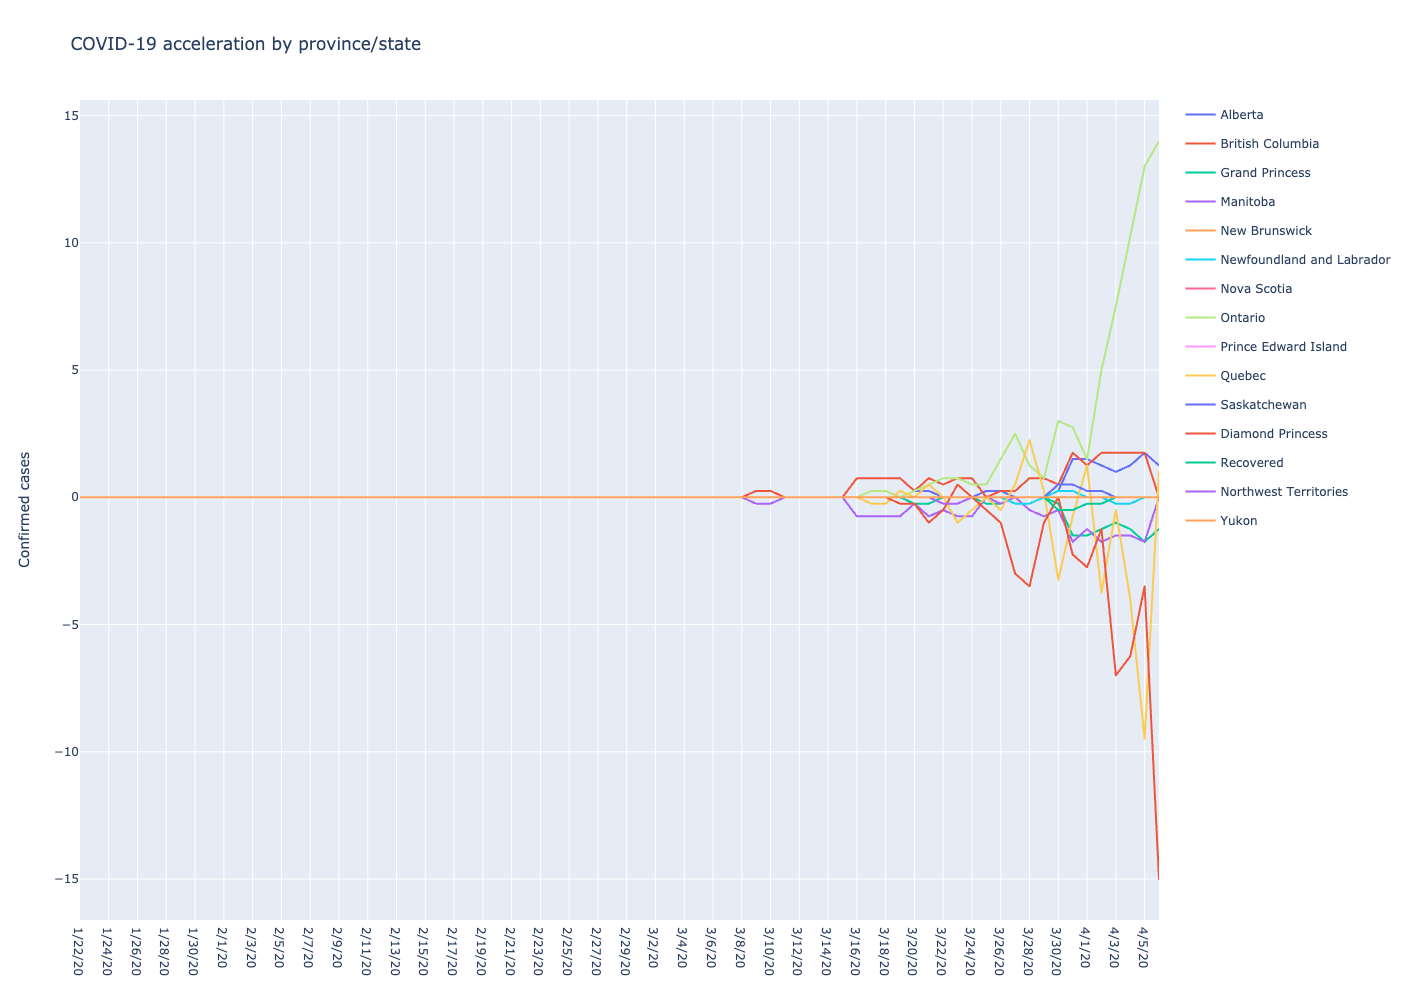

In [27]:
layout = go.Layout(title="COVID-19 acceleration by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_accel, layout=layout)
fig.show()